In [239]:
import numpy as np
male_entropy = - 1/2 * np.log2(1/2) - 1/2 * np.log2(1/2)
female_entropy = - 1/4 * np.log2(1/4) - 3/4 * np.log2(3/4)
total_entropy = male_entropy * 2/6 + female_entropy * 4/6
total_entropy

0.8741854163060885

## 머신러닝 프로세스 분류(타이타닉)

 - Business Understanding: 생존자 예측 (Task: Classification)

- Data Understanding: 수집, 통계, 시각화

In [240]:
import pandas as pd
train_data = pd.read_csv('../data/train.csv')
train_data.shape

(891, 12)

In [241]:
train_data.info() # Null 값 확인 (Age컬럼, Cabin컬럼)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [242]:
train_data.describe() # 이상치 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [243]:
train_data.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12428\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [244]:
# 성별 컬럼과 Survived 컬럼의 상관관계
# 남 == 0, 여 == 1
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [245]:
train_data['Sex'].map({'male': 0, 'female': 1}).corr(train_data['Survived'])

0.5433513806577551

In [246]:
train_data['Sex_num'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [247]:
train_data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333
Sex_num,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000


<Axes: >

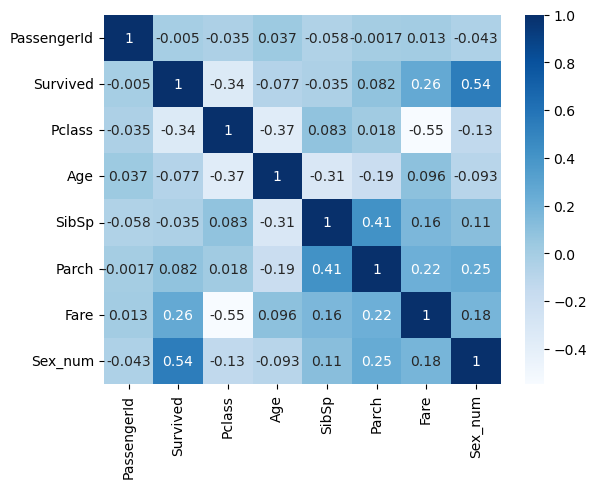

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(train_data.corr(numeric_only=True), cmap='Blues', annot=True)

- Data Preparation

In [249]:
# Age 결측치 처리
train_data.info() # Null 값 확인 (Age컬럼, Cabin컬럼)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [250]:
# train_data의 나이의 결측치에 나이의 평균 값 대입
# 평균 값 저장
train_data_age_mean  = train_data['Age'].mean()
train_data_age_mean

29.69911764705882

In [251]:
train_data['Age'].fillna(train_data_age_mean, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [252]:
test_data = pd.read_csv('../data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [253]:
test_data['Sex_num'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [254]:
# train set에 있는 평균 나이로 fill
test_data['Age'].fillna(train_data_age_mean, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Sex_num      418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


- Train set 준비

In [255]:
X_train = train_data[train_data.columns.difference(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Survived'])]
y_train = train_data['Survived']
X_train.shape, y_train.shape

((891, 6), (891,))

- Test set 준비

In [256]:
X_test = test_data[test_data.columns.difference(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])]
X_test.shape

(418, 6)

### 의사결정나무(Decision Tree) 원리

> 10개 데이터 Sampling(PPT)

In [257]:
X_train_sample = X_train[290:300][['Sex_num','Pclass']]
X_train_sample

,Sex_num,Pclass
290,1,1
291,1,1
292,0,2
293,1,3
294,0,3
295,0,1
296,0,3
297,1,1
298,0,1
299,1,1


In [258]:
y_train_sample = y_train[290:300]
y_train_sample

290    1
291    1
292    0
293    0
294    0
295    0
296    0
297    0
298    1
299    1
Name: Survived, dtype: int64

In [259]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier?
# max_depth를 설정안하면 과적합 위험이 있음

In [260]:
# 불순도 측정: Entropy 방식 적용
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train_sample, y_train_sample)

DecisionTreeClassifier(criterion='entropy')

In [261]:
from sklearn.metrics import accuracy_score
# train data에 평가
y_pred = dt.predict(X_train_sample)
accuracy_score(y_train_sample, y_pred)

0.8

> 시각화

[Text(0.6, 0.8333333333333334, 'Pclass <= 1.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'Sex_num <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.2, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

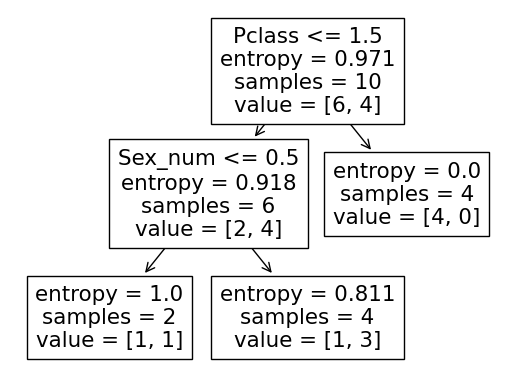

In [262]:
from sklearn.tree import plot_tree
plot_tree(dt, feature_names=X_train_sample.columns)

In [263]:
import numpy as np
# Root Node상태 
root_node_entropy = -(6/10)*np.log2(6/10) -(4/10)*np.log2(4/10)
root_node_entropy

0.9709505944546686

In [264]:
# Root Node기준으로 성별로 구분
male_entropy = -(4/5)*np.log2(4/5) -(1/5)*np.log2(1/5) 
female_entropy = -(2/5)*np.log2(2/5) -(3/5)*np.log2(3/5)

male_entropy, female_entropy

(0.7219280948873623, 0.9709505944546686)

In [265]:
# Root Node기준 성별 구분을 통한 전체 entropy (1번)
(5/10) * male_entropy + (5/10) * female_entropy

0.8464393446710154

In [266]:
# Root Node 기준 선실등급(pclass)으로 구분
first = -(2/6)*np.log2(2/6) -(4/6)*np.log2(4/6) 
second = -(1/1)*np.log2(1/1) -(0/1)*np.log2(0.1/1) # dt와 완전 일치X(scikit-learn dt는 pclass 2와3을 한개의 노드로 분류)
third = -(3/3)*np.log2(3/3) -(0/3)*np.log2(0.1/3)

first, second, third

(0.9182958340544896, 0.0, 0.0)

In [267]:
# Root Node 기준 선실등급(pclass) 구분을 통한 전체 entropy (2번) => 2번을 선택해서 Root 노드를 분리
(6/10) * first + (1/10) * second + (3/10) * third

0.5509775004326937

In [268]:
# 선실등급 = First 인 사람 중, Male과 Female로 구분

male_entropy = -(1/2)*np.log2(1/2) -(1/2)*np.log2(1/2) 
female_entropy = -(1/4)*np.log2(1/4) -(3/4)*np.log2(3/4)

male_entropy, female_entropy

(1.0, 0.8112781244591328)

In [269]:
# 선실등급 = First 인 사람 중 성별로 분류했을 때 전체 entropy (부모노의 0.918 보다 작음)
(2/6) * male_entropy + (4/6) * female_entropy

0.8741854163060885

- 의사결정나무를 전체 Train Set에 적용

In [270]:
X_train.head()

,Age,Fare,Parch,Pclass,Sex_num,SibSp
0,22.0,7.2500,0,3,0,1
1,38.0,71.2833,0,1,1,1
2,26.0,7.9250,0,3,1,0
3,35.0,53.1000,0,1,1,1
4,35.0,8.0500,0,3,0,0


In [271]:
from sklearn.metrics import accuracy_score, confusion_matrix
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

# Train set에 대해 평가(정확도)
y_pred = dt.predict(X_train)
confusion_matrix(y_train, y_pred), accuracy_score(y_train, y_pred)

(array([[547,   2],
        [ 14, 328]], dtype=int64),
 0.9820426487093153)

[Text(0.5, 0.875, 'Sex_num <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.625, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.125, 0.375, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'SibSp <= 2.5\nentropy = 0.924\nsamples = 162\nvalue = [107, 55]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(0.625, 0.375, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Fare <= 23.35\nentropy = 1.0\nsamples = 144\nvalue = [72, 72]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

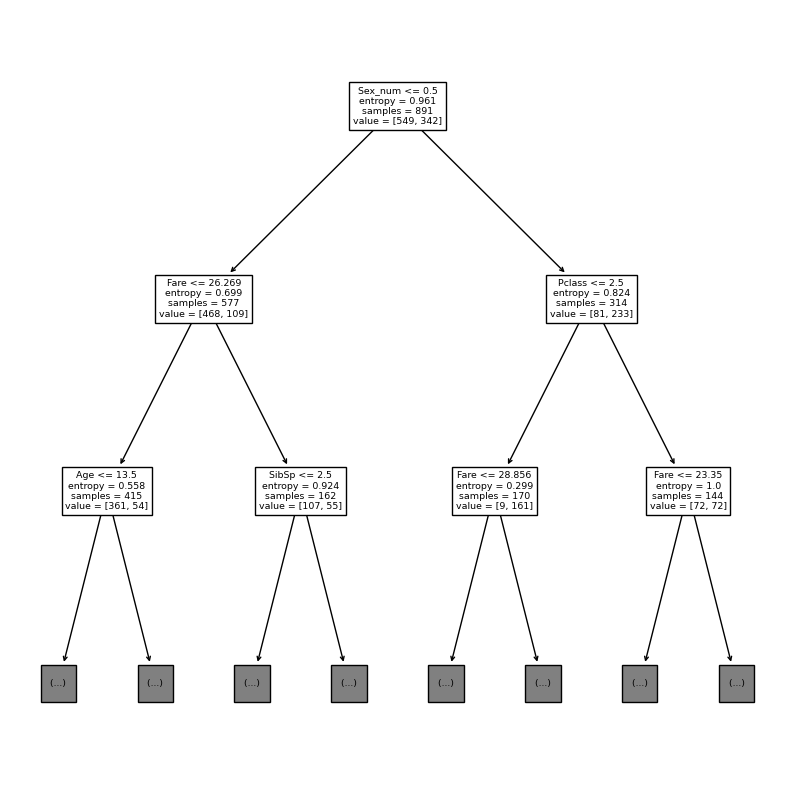

In [272]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dt, feature_names=X_train.columns, max_depth=2)

In [273]:
X_test['Fare'].fillna(X_train['Fare'].mean(), inplace=True)
y_pred_test = dt.predict(X_test)
dt_model = pd.DataFrame()
dt_model['PassengerId'] = test_data['PassengerId']
dt_model['Survived'] = y_pred_test
dt_model.to_csv('result/dt_model.csv', index=False)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12428\3283108369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'].fillna(X_train['Fare'].mean(), inplace=True)


In [274]:
# test_data['Survived'] = dt.predict(X_test)
# test_data[['PassengerId', 'Survived']].to_csv('dt_6features_0607.csv', index=False)

In [275]:
# max_depth=6 -> 과적합 방지를 위한 규제 조치
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
accuracy_score(y_train, y_pred), confusion_matrix(y_train, y_pred)

(0.8540965207631874,
 array([[503,  46],
        [ 84, 258]], dtype=int64))

In [276]:
test_data['Survived'] = dt.predict(X_test)
test_data[['PassengerId', 'Survived']].to_csv('result/dt_feature6_depth6.csv', index=False)

In [277]:
# 한 노드에 최소한 6개 이상의 데이터 이상이 있을때만 split을 함
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
accuracy_score(y_train, y_pred), confusion_matrix(y_train, y_pred)

(0.8787878787878788,
 array([[507,  42],
        [ 66, 276]], dtype=int64))

In [278]:
test_data['Survived'] = dt.predict(X_test)
test_data[['PassengerId', 'Survived']].to_csv('result/dt_feature6_leaf6.csv', index=False)

In [279]:
dt.get_depth()

18

In [280]:
# 규제 없었을 때 198개 -> 82개
dt.get_n_leaves()

82

## Ensemble 
- Random Forest

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [282]:
# 각 트리에 적용
rf = RandomForestClassifier(max_depth=6, max_samples=0.5, criterion='entropy', max_features=3)
rf.fit(X_train, y_train) # 학습
# max_samples: 리샘플링 비율

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=3,
                       max_samples=0.5)

In [283]:
y_pred = rf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       549
           1       0.90      0.74      0.81       342

    accuracy                           0.87       891
   macro avg       0.88      0.84      0.85       891
weighted avg       0.87      0.87      0.86       891



In [284]:
test_data['Survived'] = rf.predict(X_test)
test_data[['PassengerId', 'Survived']].to_csv('result/rf.csv', index=False)

- 컬럼 2개 추가

In [285]:
def age_to_category(age):
    if age < 16:
        return 0
    elif age < 50:
        return 1
    else:
        return 2

In [286]:
X_train['Age_cat'] = X_train['Age'].apply(age_to_category)
X_train['Age_cat'].value_counts()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12428\3786126639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_cat'] = X_train['Age'].apply(age_to_category)


1    734
0     83
2     74
Name: Age_cat, dtype: int64

In [287]:
X_test['Age_cat'] = X_test['Age'].apply(age_to_category)
X_test['Age_cat'].value_counts()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12428\3349857401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_cat'] = X_test['Age'].apply(age_to_category)


1    350
2     36
0     32
Name: Age_cat, dtype: int64

In [288]:
X_train['Alone'] = ((X_train['Parch'] + X_train['SibSp']) == 0).astype('int')
X_train['Alone'].value_counts()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12428\433754393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Alone'] = ((X_train['Parch'] + X_train['SibSp']) == 0).astype('int')


1    537
0    354
Name: Alone, dtype: int64

In [289]:
X_test['Alone'] = ((X_test['Parch'] + X_test['SibSp']) == 0).astype('int')
X_test['Alone'].value_counts()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_12428\2208173119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Alone'] = ((X_test['Parch'] + X_test['SibSp']) == 0).astype('int')


1    253
0    165
Name: Alone, dtype: int64

In [290]:
# 6 개 + Age_cat, Alone features 추가 (총 8개 사용)
rf_8 = RandomForestClassifier(max_depth=6, max_samples=0.5, criterion='entropy', max_features=3)
rf_8.fit(X_train, y_train) # 학습

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=3,
                       max_samples=0.5)

In [291]:
y_pred = rf_8.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       549
           1       0.87      0.73      0.79       342

    accuracy                           0.86       891
   macro avg       0.86      0.83      0.84       891
weighted avg       0.86      0.86      0.85       891



In [293]:
test_data['Survived'] = rf_8.predict(X_test)
test_data[['PassengerId','Survived']].to_csv('result/rf_8features_maxdepth6.csv', index=False)

- Adaboost

In [294]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier() # Default: Decision Tree(max_depth=1)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier()

In [295]:
# Train set에 대해 평가
y_pred = ada_boost.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       549
           1       0.80      0.77      0.79       342

    accuracy                           0.84       891
   macro avg       0.83      0.83      0.83       891
weighted avg       0.84      0.84      0.84       891



In [297]:
test_data['Survived'] = ada_boost.predict(X_test)
test_data[['PassengerId','Survived']].to_csv('result/adaboost_8features.csv', index=False)

- Gradient Boosting

In [298]:
from sklearn.ensemble import GradientBoostingClassifier

In [299]:
g_boost = GradientBoostingClassifier()
g_boost.fit(X_train, y_train) # 학습

GradientBoostingClassifier()

In [300]:
# Train Set에 대해 평가
y_pred = g_boost.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       549
           1       0.91      0.82      0.87       342

    accuracy                           0.90       891
   macro avg       0.90      0.89      0.89       891
weighted avg       0.90      0.90      0.90       891



In [301]:
test_data['Survived'] = g_boost.predict(X_test)
test_data[['PassengerId','Survived']].to_csv('result/g_boost_8features.csv', index=False)

In [302]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[521,  28],
       [ 60, 282]], dtype=int64)

In [307]:
precision = 521 / (521+60)
recall = 521 / (521+28)
precision, recall

(0.8967297762478486, 0.9489981785063752)

In [310]:
(0.92+0.87)/2

0.895

In [316]:
weighted_avg = 549/(549+342)*0.92 + 342/(549+342)*0.87

- SVM (Support Vector Machine)

In [318]:
from sklearn.datasets import make_blobs
import mglearn

In [326]:
X, y = make_blobs(random_state=300)
X.shape, y.shape

((100, 2), (100,))

In [327]:
set(y)

{0, 1, 2}

In [328]:
y

array([1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2,
       0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2,
       2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0])

In [329]:
X = X[y <= 1]
y = y[y <= 1]

X.shape, y.shape

((67, 2), (67,))

In [330]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0])

In [322]:
set(y)

{0, 1}

> SVM (kernel=linear)

In [323]:
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(X,y) # 학습

SVC(kernel='linear')

In [324]:
y_pred = svc_linear.predict(X)
confusion_matrix(y, y_pred)

array([[30,  4],
       [ 9, 24]], dtype=int64)

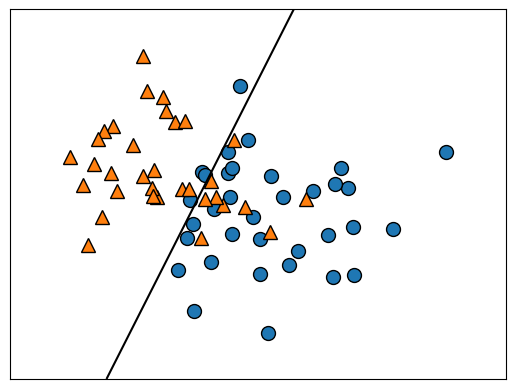

In [325]:
mglearn.plots.plot_2d_separator(svc_linear, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [331]:
svc_rbf = SVC(kernel='rbf') # 비선형
svc_rbf.fit(X,y) # 학습

SVC()

In [332]:
y_pred = svc_rbf.predict(X)
confusion_matrix(y, y_pred)

array([[31,  3],
       [ 9, 24]], dtype=int64)

In [334]:
X

array([[-2.65343637e+00, -4.96640822e+00],
       [-3.84507499e+00, -6.03695018e+00],
       [-1.74251082e+00, -6.41484112e+00],
       [-9.05264968e-01, -6.67979231e+00],
       [-1.53619788e+00, -5.15594915e+00],
       [-3.72910245e+00, -4.23806996e+00],
       [-2.30108722e+00, -6.59552686e+00],
       [-1.91280995e+00, -5.88572641e+00],
       [-2.74582847e+00, -4.76290593e+00],
       [-1.65719415e+00, -4.96368225e+00],
       [-1.34422617e+00, -3.71306232e+00],
       [-2.90781504e+00, -1.82655245e+00],
       [-1.44418612e+00, -4.44218483e+00],
       [-2.34723672e+00, -3.30901732e+00],
       [-9.03030163e-01, -5.90250120e+00],
       [-3.44534265e+00, -4.43355898e+00],
       [-1.23643229e+00, -2.51017909e+00],
       [-3.92722211e+00, -4.70654782e+00],
       [-2.24167174e+00, -4.79041648e+00],
       [-1.88898004e+00, -4.41587741e+00],
       [-1.16437961e+00, -5.20022806e+00],
       [-7.34580322e-01, -5.74311817e+00],
       [-1.10776665e+00, -3.69376890e+00],
       [-2.

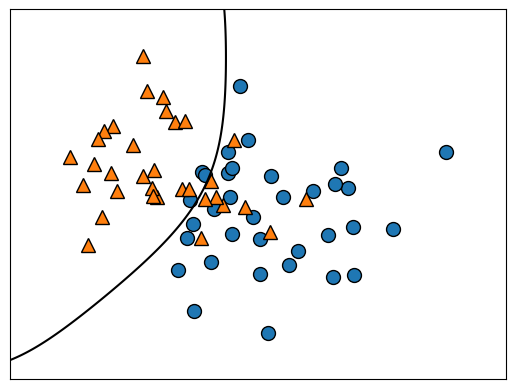

In [333]:
mglearn.plots.plot_2d_separator(svc_rbf, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

- 타이타닉 예제에 SVC 적용

In [335]:
# kernel=linear model
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

y_pred = svc_linear.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       549
           1       0.75      0.68      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.78       891
weighted avg       0.79      0.79      0.79       891



In [336]:
# kernel=rbf
# Scale에 민감할 수 있음!
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

y_pred = svc_rbf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       549
           1       0.69      0.31      0.43       342

    accuracy                           0.68       891
   macro avg       0.68      0.61      0.60       891
weighted avg       0.68      0.68      0.64       891



> MinMax Scaling

In [341]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [342]:
# pd.DataFrame(scaler.transform(X_train)).describe()

,0,1,2,3,4,5,6,7
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.367921,0.062858,0.063599,0.654321,0.352413,0.065376,0.494949,0.602694
std,0.163383,0.096995,0.134343,0.418036,0.477990,0.137843,0.209942,0.489615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.015440,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000
50%,0.367921,0.028213,0.000000,1.000000,0.000000,0.000000,0.500000,1.000000
75%,0.434531,0.060508,0.000000,1.000000,1.000000,0.125000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [344]:
svc_rbf = SVC(kernel='rbf')
# X_train 변환
X_train_scaled = scaler.transform(X_train)
svc_rbf.fit(X_train_scaled, y_train)  # 학습 (Scaled 데이터로)

y_pred = svc_rbf.predict(X_train_scaled)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       549
           1       0.85      0.68      0.75       342

    accuracy                           0.83       891
   macro avg       0.84      0.80      0.81       891
weighted avg       0.83      0.83      0.83       891



fit()은 데이터를 학습시키는 메서드이고 transform()은 실제로 학습시킨 것을 적용하는 메서드이다.

In [345]:
# kernel=linear 
svc_linear.fit(X_train_scaled, y_train)
y_pred = svc_linear.predict(X_train_scaled)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       549
           1       0.75      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891

